In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('C:\\Users\\Sasi\\Desktop\\data science\\Deployment\\breast cancer\\Data\\breast_cancer.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df['target'] = df['target'].astype('int')

c:\users\sasi\anaconda3\envs\breast_cancer\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


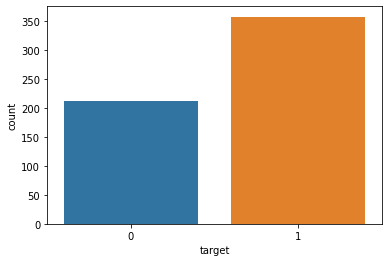

In [6]:
sns.countplot(df['target'])
plt.show()

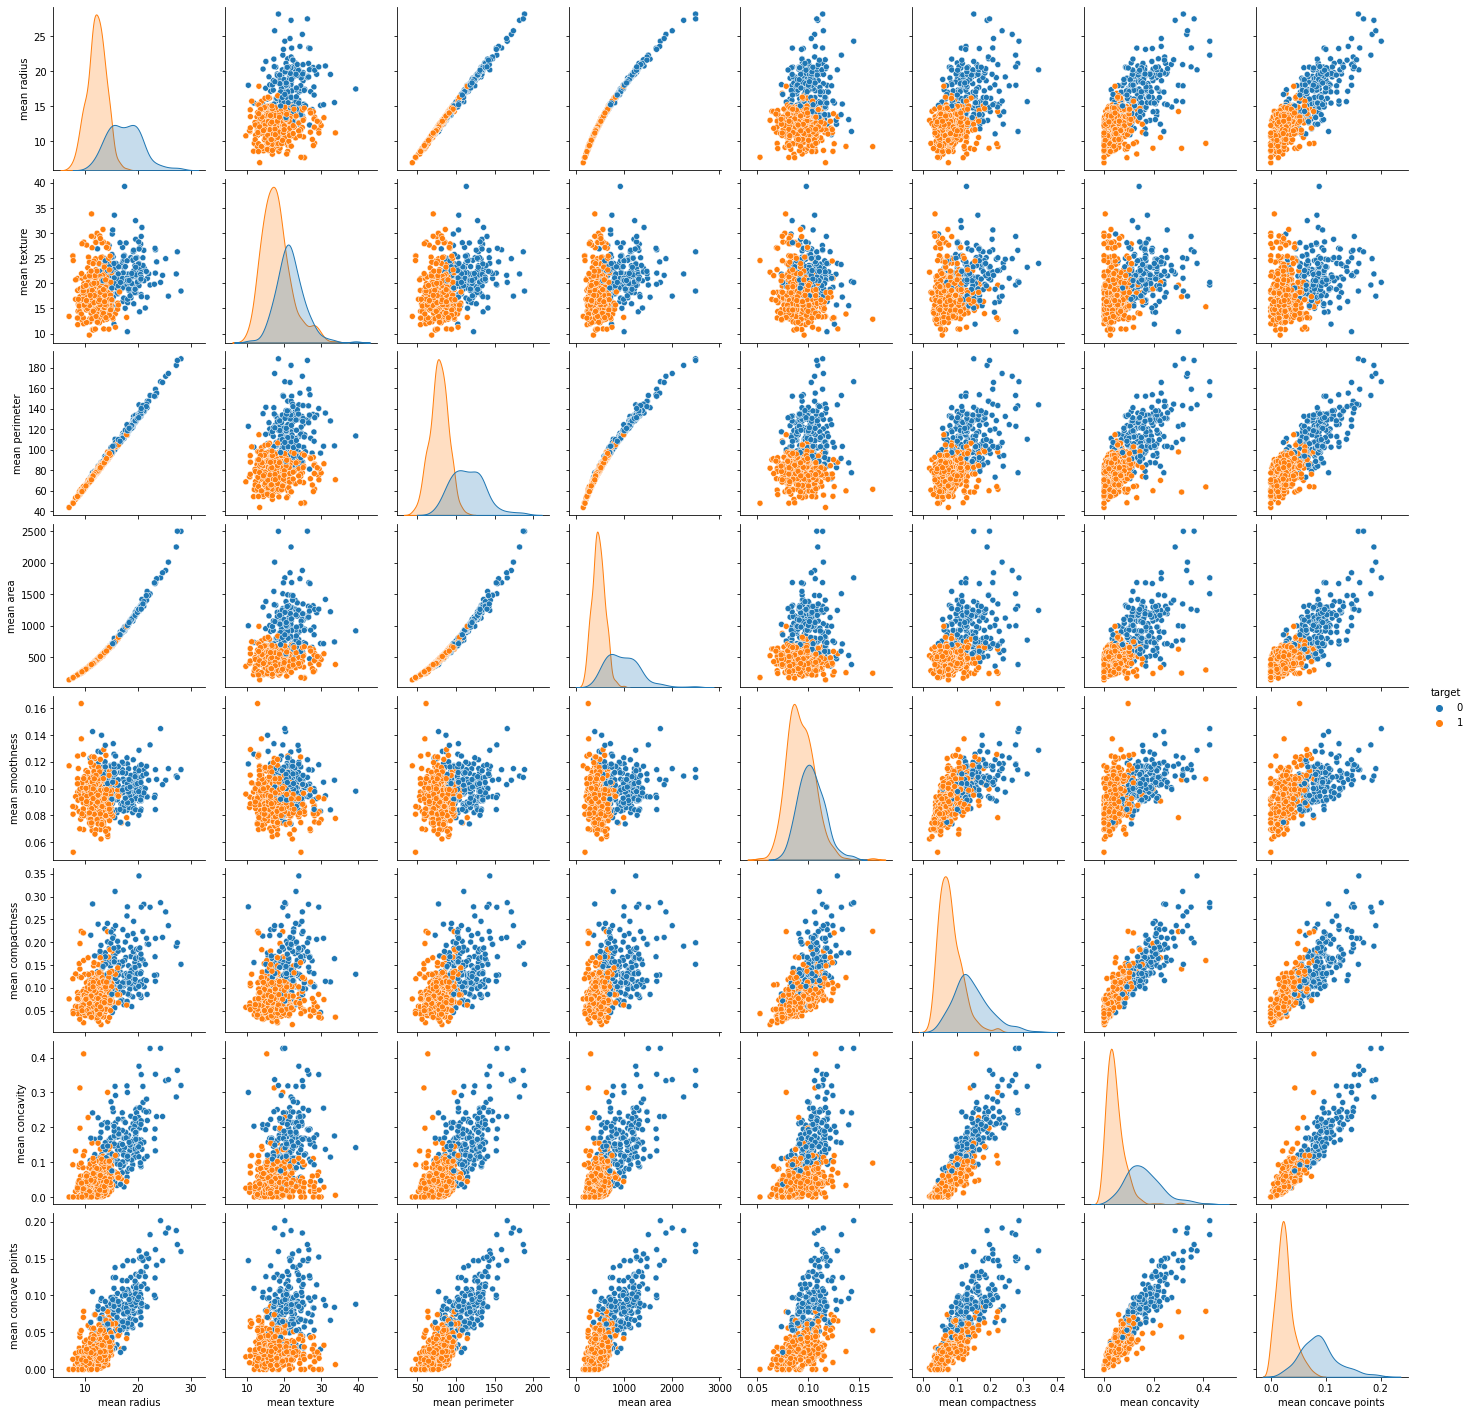

In [7]:
sns.pairplot(df, hue = 'target',vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points'])

In [ ]:
plt.figure(figsize =(20,15))
sns.heatmap(df.corr(), annot = True)

In [ ]:
y = df['target']
X = df.drop('target', axis =1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_obj = scaler.fit(X_train)
X_train_scaled = scaler_obj.transform(X_train)
X_test_scaled = scaler_obj.transform(X_test)


## Model 1

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svc_model = SVC()
svc_model.fit(X_train_scaled,y_train)

y_pred = svc_model.predict(X_test_scaled)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(accuracy_score(y_test, y_pred))

## Model 2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lg_model = LogisticRegression()
lg_model.fit(X_train_scaled,y_train)

y_pred = lg_model.predict(X_test_scaled)

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot = True)
plt.show()

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

## Model 3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train_scaled,y_train)

y_pred = rf_model.predict(X_test_scaled)

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot = True)
plt.show()

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

In [ ]:
model_filename = 'model.pkl'
joblib.dump(rf_model, model_filename)

In [ ]:
scaler_filename = 'scaled.pkl'
joblib.dump(scaler_obj, scaler_filename)